In [1]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



# Load environment variables

In [3]:
load_dotenv()
user = os.environ['PG_USER']
password = os.environ['PG_PASSWORD']
host = os.environ['PG_HOST']
port = os.environ['PG_PORT']
database = os.environ['PG_DATABASE']

Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 6
Python-dotenv could not parse statement starting at line 11


# Connect database

In [4]:
def connect():
    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(
              host=host,
              database=database,
              user=user,
              password=password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)   
        
    print("All good, Connection successful!")
    return conn

In [5]:
def sql_to_dataframe(conn, query):
    """Import data from a PostgreSQL database using a SELECT query"""
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:   
    tuples_list = cursor.fetchall()   
    
    # Now we need to transform the list into a pandas DataFrame:   
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [6]:
# create query
query = """ SELECT * FROM public.xdr_data  """

#opening the connection
conn = connect()

#loading our dataframe
df = sql_to_dataframe(conn, query)

#closing the connection
conn.close()

Connecting..
All good, Connection successful!


In [7]:
df.sample(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
37856,1.304243e+19,4/25/2019 2:33,85.0,4/26/2019 2:33,44.0,86399.0,2.082017e+14,3.365831e+10,8.637690e+13,D23739A,...,16625853.0,17377503.0,6316397.0,13355624.0,737645411.0,4878091.0,40135209.0,15713749.0,54989905.0,766160532.0
59825,7.277826e+18,4/26/2019 2:39,807.0,4/27/2019 2:39,692.0,86399.0,2.082018e+14,3.366250e+10,8.637690e+13,D77756B,...,22611196.0,15326989.0,20653518.0,6629633.0,53525911.0,16368657.0,88028545.0,4153552.0,45003850.0,108172001.0
1452,1.304243e+19,4/24/2019 1:31,614.0,4/25/2019 1:31,632.0,86400.0,2.082018e+14,3.366553e+10,8.637690e+13,T93796B,...,5602920.0,4573560.0,13770692.0,5534668.0,704552456.0,3916597.0,135722622.0,10671123.0,25847947.0,731795761.0
144909,6.917538e+18,4/29/2019 5:51,906.0,4/30/2019 5:41,925.0,85800.0,2.082019e+14,3.362835e+10,3.546611e+13,G76398A,...,3697605.0,18937050.0,7130490.0,21453896.0,752409482.0,10093342.0,677581846.0,16105946.0,68517963.0,765385754.0
85119,7.277826e+18,4/27/2019 11:21,29.0,4/28/2019 0:15,691.0,46466.0,2.082010e+14,3.366257e+10,8.601480e+13,T12070B,...,8175137.0,10437614.0,9541455.0,949522.0,480844226.0,7984675.0,444731176.0,3190633.0,23086535.0,503665023.0
55490,1.311448e+19,4/25/2019 15:20,85.0,4/27/2019 12:49,902.0,163732.0,2.082003e+14,3.366373e+10,3.572241e+13,D53539C,...,13248280.0,21087271.0,1660629.0,14873299.0,274166233.0,12477426.0,327096759.0,385723.0,53605173.0,302338548.0
31191,1.311448e+19,4/24/2019 15:47,784.0,4/26/2019 7:45,873.0,143885.0,2.082014e+14,3.365838e+10,3.566061e+13,D21789C,...,2860037.0,15626370.0,15752220.0,20304155.0,557244637.0,13584179.0,571345870.0,15581399.0,67752399.0,588618635.0
138904,1.304243e+19,4/29/2019 2:35,659.0,4/30/2019 2:35,626.0,86399.0,2.082017e+14,3.366033e+10,8.637690e+13,T70488A,...,12153002.0,2835896.0,17928273.0,15374919.0,594623849.0,13648158.0,759193735.0,4830970.0,40710263.0,634477330.0
69083,7.349883e+18,4/26/2019 8:01,582.0,4/27/2019 1:06,128.0,61529.0,2.082017e+14,3.366950e+10,3.590401e+13,L12759C,...,15422497.0,19714600.0,6480943.0,3137259.0,715397175.0,11671316.0,743761559.0,15325255.0,51545947.0,746713106.0
145240,7.277826e+18,4/29/2019 6:03,145.0,4/30/2019 5:19,45.0,83774.0,2.082015e+14,3.361577e+10,3.556121e+13,D10056A,...,9793440.0,5644488.0,21316959.0,6584249.0,559335376.0,5303425.0,250095404.0,4848671.0,24839117.0,598695718.0


# Sqlalchemy

In [8]:
def data_from_postgres(query):
    # Create the URI
    uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
    
    # Create the engine
    try:
        alchemyEngine = create_engine(uri)
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)
    print("Engine created!")        
    # Connect to PostgreSQL server
    try:
        dbConnection = alchemyEngine.connect()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)

    print("Connection established")
    df = pd.read_sql(query, dbConnection)
    # Close connection
    dbConnection.close()

    return df

In [9]:
# create query
query = """ SELECT * FROM public.xdr_data  """

In [10]:
df = data_from_postgres(query)

Engine created!
Connection established


In [11]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [14]:
# Convert data types
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [14]:
# Group data by handset type and count usage
top_handsets = df['Handset Type'].value_counts()

# Sort handsets by usage count in descending order
top_handsets = top_handsets.sort_values(ascending=False)

# Select top 10 handsets
top_10_handsets = top_handsets.head(10)

# Display the top 10 handsets
print("Top 10 Handsets:")
top_10_handsets


Top 10 Handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

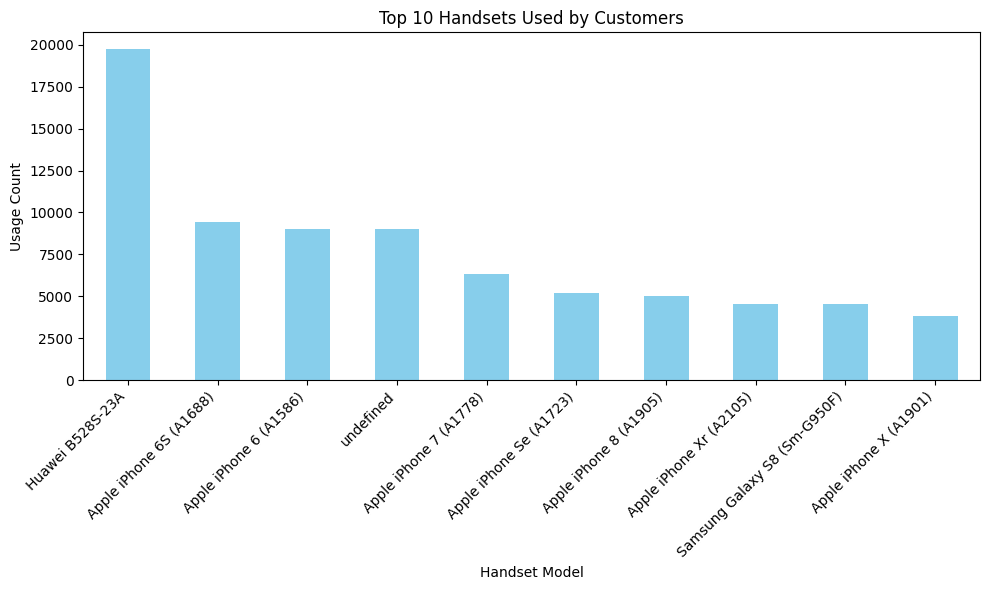

In [15]:
# Create a bar plot for the top 10 handsets
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Model')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Extract manufacturer information from the 'Handset Type' column
df['Manufacturer'] = df['Handset Type'].str.split().str[0]

# Group data by manufacturer and count usage
top_manufacturers = df['Manufacturer'].value_counts()

# Sort manufacturers by usage count in descending order
top_manufacturers = top_manufacturers.sort_values(ascending=False)

# Select top 3 manufacturers
top_3_manufacturers = top_manufacturers.head(3)

# Display the top 3 manufacturers
print("Top 3 Handset Manufacturers:")
top_3_manufacturers


Top 3 Handset Manufacturers:


Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

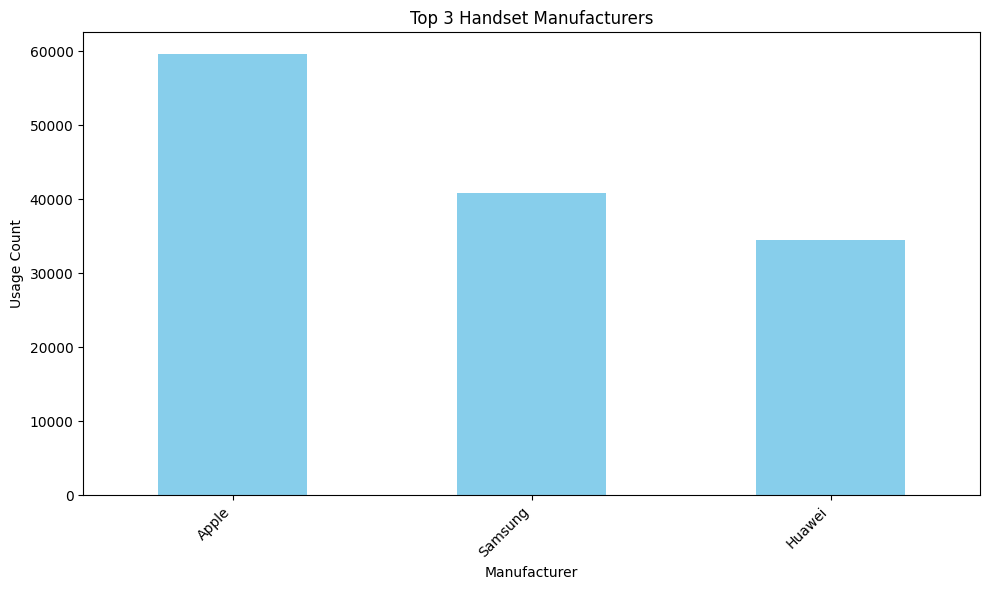

In [17]:
# Create a bar plot for the top 3 handset manufacturers
plt.figure(figsize=(10, 6))
top_3_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Filter data by top 3 manufacturers
top_3_manufacturer_data = df[df['Manufacturer'].isin(top_3_manufacturers.index)]

# Group data by handset model and manufacturer, and count usage
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby(['Manufacturer', 'Handset Type']).size()

# Sort handsets by usage per manufacturer
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.groupby('Manufacturer').nlargest(5).reset_index(level=0, drop=True)

# Display the top 5 handsets per manufacturer
print("Top 5 Handsets per Top 3 Handset Manufacturers:")
top_5_handsets_per_manufacturer


Top 5 Handsets per Top 3 Handset Manufacturers:


Manufacturer  Handset Type                  
Apple         Apple iPhone 6S (A1688)            9419
              Apple iPhone 6 (A1586)             9023
              Apple iPhone 7 (A1778)             6326
              Apple iPhone Se (A1723)            5187
              Apple iPhone 8 (A1905)             4993
Huawei        Huawei B528S-23A                  19752
              Huawei E5180                       2079
              Huawei P20 Lite Huawei Nova 3E     2021
              Huawei P20                         1480
              Huawei Y6 2018                      997
Samsung       Samsung Galaxy S8 (Sm-G950F)       4520
              Samsung Galaxy A5 Sm-A520F         3724
              Samsung Galaxy J5 (Sm-J530)        3696
              Samsung Galaxy J3 (Sm-J330)        3484
              Samsung Galaxy S7 (Sm-G930X)       3199
dtype: int64

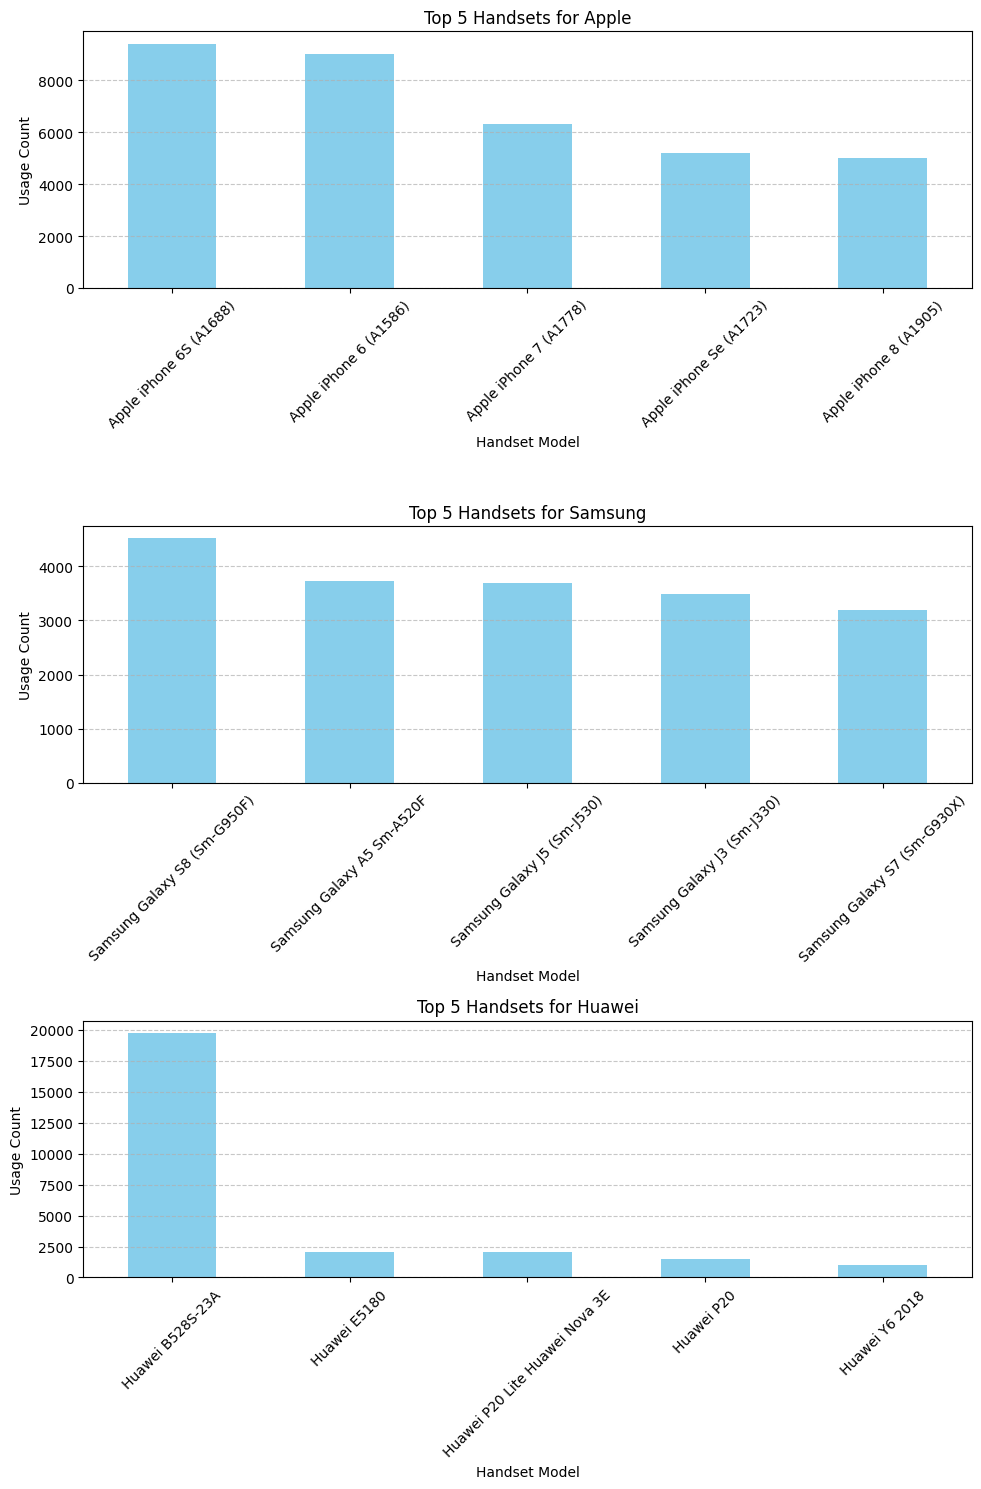

In [19]:
# Create a figure with subplots for each manufacturer
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Iterate over the top 3 manufacturers
for i, manufacturer in enumerate(top_3_manufacturers.index):
    # Filter data for the current manufacturer
    manufacturer_data = top_3_manufacturer_data[top_3_manufacturer_data['Manufacturer'] == manufacturer]
    # Group data by handset model and count usage
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    # Plot bar chart for top 5 handsets for the current manufacturer
    top_5_handsets.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Top 5 Handsets for {manufacturer}')
    axes[i].set_xlabel('Handset Model')
    axes[i].set_ylabel('Usage Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [20]:
# Assuming 'MSISDN/Number' is the unique identifier for each user
# Group the data by 'MSISDN/Number' and count the occurrences of xDR sessions for each user
sessions_per_user = df.groupby('MSISDN/Number')['Bearer Id'].count()

# Display the aggregated number of xDR sessions per user
sessions_per_user

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64

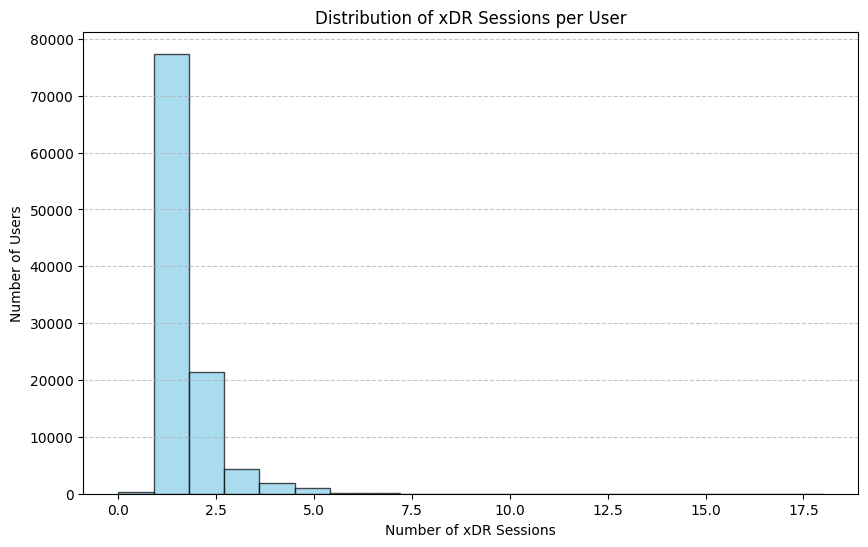

In [21]:
# Create a histogram to visualize the distribution of xDR sessions per user
plt.figure(figsize=(10, 6))
plt.hist(sessions_per_user, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of xDR Sessions per User')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Assuming 'MSISDN/Number' is the unique identifier for each user
# Group the data by 'MSISDN/Number' and sum the session durations for each user
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Display the aggregated session duration per user
session_duration_per_user

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

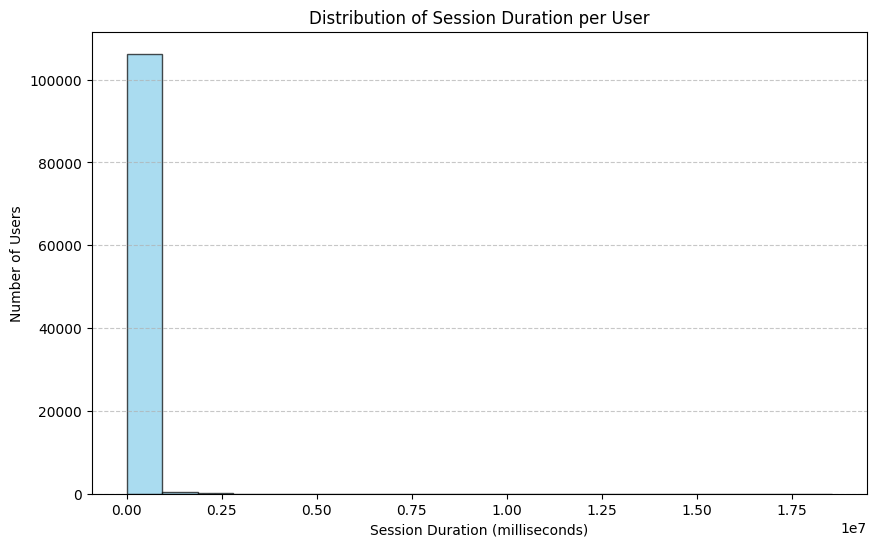

In [23]:
# Create a histogram to visualize the distribution of session durations per user
plt.figure(figsize=(10, 6))
plt.hist(session_duration_per_user, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Session Duration per User')
plt.xlabel('Session Duration (milliseconds)')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# Group the data by 'MSISDN/Number' and sum the download (DL) and upload (UL) data for each user
total_data_per_user = df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Display the aggregated total download (DL) and upload (UL) data per user
print(total_data_per_user)

               Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                    
3.360100e+10       8.426375e+08        36053108.0
3.360100e+10       1.207552e+08        36104459.0
3.360100e+10       5.566597e+08        39306820.0
3.360101e+10       4.019932e+08        20327526.0
3.360101e+10       1.363130e+09        94280527.0
...                         ...               ...
3.379000e+10       6.879252e+08        26716429.0
3.379000e+10       4.445751e+08        35732243.0
3.197021e+12       1.948281e+08        37295915.0
3.370000e+14       5.396350e+08        56652839.0
8.823971e+14       7.869760e+07        60456049.0

[106856 rows x 2 columns]


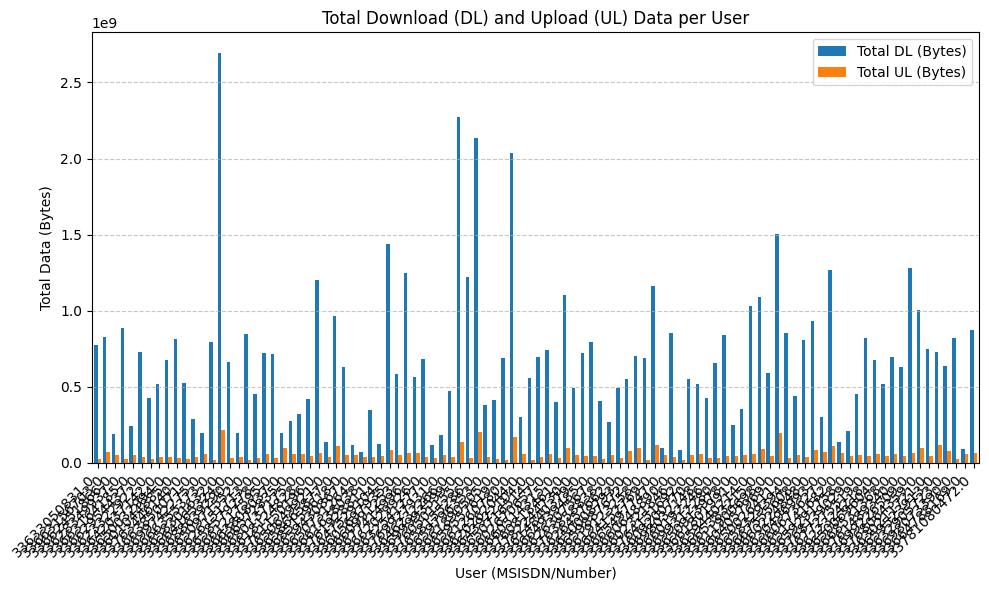

In [25]:
# Create a bar plot to visualize the total download (DL) and upload (UL) data per user
total_data_per_user.sample(100).plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Total Download (DL) and Upload (UL) Data per User')
plt.xlabel('User (MSISDN/Number)')
plt.ylabel('Total Data (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Total DL (Bytes)', 'Total UL (Bytes)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()